#-----Dropout ,  Batch  Normalization , Large Batch Size,Learning rate scheduler----

---



#Mounting Google drive

accessing google drive / authendication

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras                                                                                        
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


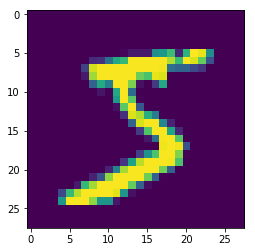

In [316]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

##Reshaping the x_train and x_test

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

##Normalizing /Scaling

Dividing by 255 , (highest value  the pixel )

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [319]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

##Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [321]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Buiding a sequential model

In [375]:
from keras.layers import Activation, MaxPooling2D, BatchNormalization, Dropout

# Model is built by stacking layers using keras sequential model
# Convolution block is followed by a transition block

model = Sequential() 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10,1,activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(Convolution2D(10,1,activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10,1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10,6))
model.add(Flatten())                                                        
model.add(Activation('softmax'))                                            

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_955 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_460 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_545 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_956 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_461 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_546 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 12, 12, 16)        0         
__________

In [376]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_955 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_460 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_545 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_956 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_461 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_546 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 12, 12, 16)        0         
__________

##Importing Model checkpoint

The model check point is used to store the model weight at specific points

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/4/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

##Compiling the model

categorical_crossentropy is used as loss function

Adam with learning rate of 0.001 is optimizer

Accuracy is taken as metric

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

##Fitting / Training the model

batch size  = 128 images
Epochs  =  10

In [380]:


model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1,
         callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1866 - acc: 0.9418 - val_loss: 0.0789 - val_acc: 0.9760

Epoch 00001: val_acc improved from -inf to 0.97600, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/4/epochs:001-val_acc:0.976.hdf5
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 176us/step - loss: 0.0660 - acc: 0.9795 - val_loss: 0.0738 - val_acc: 0.9770

Epoch 00002: val_acc improved from 0.97600 to 0.97700, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/4/epochs:002-val_acc:0.977.hdf5
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 177us/step - loss: 0.0536 - acc: 0.9833 - val_loss: 0.0394 - val_acc: 0.9873

Epoch 00003: val_acc 

In [381]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=20, verbose=1,
         callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  512/60000 [..............................] - ETA: 15s - loss: 0.0178 - acc: 0.9941

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 4s 69us/step - loss: 0.0248 - acc: 0.9918 - val_loss: 0.0223 - val_acc: 0.9938

Epoch 00001: val_acc improved from 0.99330 to 0.99380, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/4/epochs:001-val_acc:0.994.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 4s 65us/step - loss: 0.0228 - acc: 0.9924 - val_loss: 0.0206 - val_acc: 0.9931

Epoch 00002: val_acc did not improve from 0.99380
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 4s 65us/step - loss: 0.0204 - acc: 0.9934 - val_loss: 0.0225 - val_acc: 0.9931

Epoch 00003: val_acc did not improve from 0.99380
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 4s 64us/step - loss: 0.0208 - acc: 0.9934 - val_loss: 0.0207 - val

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/4/epochs:014-val_acc:0.994.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])

In [383]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.018866214980721996, 0.9945]
